# Final Project

Description of ES1/S&P500 and what is it?

-S&P500, also know as The Standard and Poor's 500, is a stock market index tracking the stock performance of 500 largest trading companies listed in the United States. 

-They represents the leading industries of the U.S economy

-It is one of the most widely-used indexes for the U.S. stock market

-There are 12 sectors:
1. Technology (E.G. Microsoft)
2. Communication services (E.G. Google)
3. Consumer Cyclical (E.G. Amazon, Tesla)
4. Consumer electronics (E.G. Apple)
5. Healthcare (E.G. Johnson and Johnson)
6. Financials (E.G. Visa)
7. Industrials
8. Real Estates
9. Energy
10. Utilities
11. Basic Materials
12. Consumer Defensive (E.G Walmart)

This project will be divided into 2 parts:
- Data Exploration
- Time series analysis using LSTM and Arima

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# !pip install plotly

In [46]:
# !pip install chart_studio

In [2]:
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import gc

# Data Exploration

In [3]:
# workpath
# df1 = pd.read_csv(r'C:\Users\bloomberg\Downloads\school\es1_weekly4.csv',parse_dates=True)
#home path
df1 = pd.read_csv(r'C:\Users\Lenovo\Downloads\school\es1_weekly4.csv',parse_dates=True)

# df1["Date"]= pd.to_datetime(df1["Date"])
df1['Volume'] = df1['Volume'].astype(float) 
# df1 = df1.set_index('Date')
print(df1.info())
df1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184 entries, 0 to 1183
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1184 non-null   object 
 1   Open     1184 non-null   float64
 2   High     1184 non-null   float64
 3   Low      1184 non-null   float64
 4   Close    1184 non-null   float64
 5   SMAVG5   1184 non-null   float64
 6   SMAVG10  1184 non-null   float64
 7   SMAVG30  1184 non-null   float64
 8   Volume   1184 non-null   float64
dtypes: float64(8), object(1)
memory usage: 83.4+ KB
None


,Date,Open,High,Low,Close,SMAVG5,SMAVG10,SMAVG30,Volume
0,2000-01-07,1532.63,1539.83,1425.58,1502.52,1503.76,1488.86,1438.25,42730000.0
1,2000-01-14,1502.52,1528.51,1480.91,1521.31,1512.40,1496.66,1441.27,32750000.0
2,2000-01-21,1521.05,1528.51,1490.43,1496.86,1514.46,1500.06,1444.44,24710000.0
3,2000-01-28,1496.60,1511.53,1401.13,1406.54,1490.99,1491.79,1441.90,45840000.0
4,2000-02-04,1405.25,1491.97,1396.76,1473.44,1480.13,1491.63,1441.30,38320000.0
...,...,...,...,...,...,...,...,...,...
1179,2022-08-12,4149.75,4282.75,4113.00,4281.00,4078.25,3961.23,4187.97,288809984.0
1180,2022-08-19,4277.00,4327.50,4220.75,4231.50,4151.55,3994.32,4182.92,293940000.0
1181,2022-08-26,4221.00,4221.50,4042.75,4059.50,4170.45,4032.70,4171.04,330009984.0
1182,2022-09-02,4024.00,4072.75,3903.50,3924.50,4128.65,4033.52,4152.34,405430016.0


# $S&P500 opening and closing prices between 2000 and today

In [195]:
trace1 = go.Scatter(
    x = df1['Date'],
    y = df1['Open'],
    mode = 'lines',
    name = 'Open'
)

trace2 = go.Scatter(
    x = df1['Date'],
    y = df1['Close'],
    mode = 'lines',
    name = 'Close'
)
layout = dict(
    title='Historical S&P500 Prices (2000-2022) with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1,trace2]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

# $S&P500 volumes from 2000 until today

In [196]:
trace1 = go.Scatter(
    x = df1['Date'],
    y = df1['Volume'].astype(float),
    mode = 'lines',
    name = 'Open'
)

layout = dict(
    title='Historical S&P500 Prices (2000-2022) with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

# $S&P500 moving average 5, 10 and 30 from 2000 until today

In [197]:
trace1 = go.Scatter(
    x = df1['Date'],
    y = df1['SMAVG5'].astype(float),
    mode = 'lines',
    name = 'MA5'
)

trace2 = go.Scatter(
    x = df1['Date'],
    y = df1['SMAVG10'].astype(float),
    mode = 'lines',
    name = 'MA10'
)

trace3 = go.Scatter(
    x = df1['Date'],
    y = df1['SMAVG30'].astype(float),
    mode = 'lines',
    name = 'MA30'
)
layout = dict(
    title='Historical S&P500 Prices (2000-2022) with the Slider ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                #change the count to desired amount of months.
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=36,
                     label='3y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1,trace2,trace3]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")

# History of S&P500 
- The S&P 500 was introduced in 1957 as a stock market index to track the value of 500 large corporations listed on the New York Stock Exchange.

- Between 2000 and 2002, the stock market experience a bubble crash and the S&P500 falls to almost 25%

- During the 2008 financial crisis and the Great Recession, the S&P 500 fell 46.13% from October 2007 to March 2009 but recovered all of its losses by March 2013.

- In 2020, the coronavirus pandemic sent the world into a recession and equity markets reeling as the S&P 500 plummeted nearly 20%. 

- The S&P500 bounced back in the second half of 2020 and reached several all-time highs in 2021.

# 4 majors market crash throughout 2000 and 2022

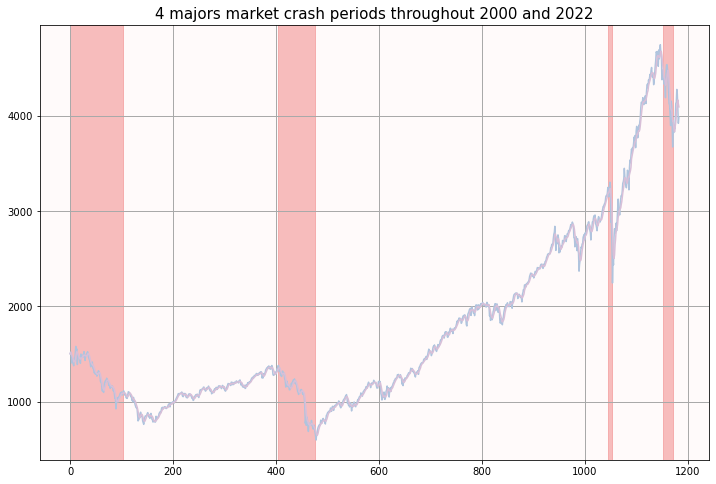

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_facecolor('snow')
plt.grid(True, linewidth=1, color = 'darkgrey')

ax.plot(df1['Close'], color='lightsteelblue')
ax.plot(df1['SMAVG5'], color='thistle')

plt.axvspan(0, 103, color='lightcoral', alpha=0.5)#2000
plt.axvspan(404, 475, color='lightcoral', alpha=0.5)#2008
plt.axvspan(1045, 1054, color='lightcoral', alpha=0.5)#2020
plt.axvspan(1152,1171, color='lightcoral', alpha=0.5)#2022

plt.ylabel('', fontsize=15)
plt.title('4 majors market crash periods throughout 2000 and 2022', fontsize=15)
plt.show()

In [8]:
# work path
# df2 = pd.read_csv(r'C:\Users\bloomberg\Downloads\school\es1_weekly4.csv',index_col='Date',parse_dates=True)

# home path
df2 = pd.read_csv(r'C:\Users\Lenovo\Downloads\school\es1_weekly4.csv',index_col='Date',parse_dates=True)
df2

,Open,High,Low,Close,SMAVG5,SMAVG10,SMAVG30,Volume
Date,,,,,,,,
2000-01-07,1532.63,1539.83,1425.58,1502.52,1503.76,1488.86,1438.25,42730000
2000-01-14,1502.52,1528.51,1480.91,1521.31,1512.40,1496.66,1441.27,32750000
2000-01-21,1521.05,1528.51,1490.43,1496.86,1514.46,1500.06,1444.44,24710000
2000-01-28,1496.60,1511.53,1401.13,1406.54,1490.99,1491.79,1441.90,45840000
2000-02-04,1405.25,1491.97,1396.76,1473.44,1480.13,1491.63,1441.30,38320000
...,...,...,...,...,...,...,...,...
2022-08-12,4149.75,4282.75,4113.00,4281.00,4078.25,3961.23,4187.97,288809984
2022-08-19,4277.00,4327.50,4220.75,4231.50,4151.55,3994.32,4182.92,293940000
2022-08-26,4221.00,4221.50,4042.75,4059.50,4170.45,4032.70,4171.04,330009984


# Defining the major events

In [9]:
period1 = df2.loc['2000-01-07':'2002-12-27'] #dot com bubble crash
period2 = df2.loc['2007-10-05':'2008-12-26'] # financial market crash 
period3 = df2.loc['2020-01-03':'2020-12-25'] # covid-19
period4 = df2.loc['2022-01-07':] #ukraine war 2022-09-01

# Event 1: Dot Com Bubble Crash

In 2000, the stock market experienced a bubble. This period was marked by overvaluations, excess public enthusiasm for stocks, and speculation in the technology sector. When the bubble burst between 2000 and 2002, the S&P 500 took a major hit. The S&P recovered, eventually reaching new highs in 2007. This period was fueled by growth in housing, the financial sector stocks, and commodity stocks.

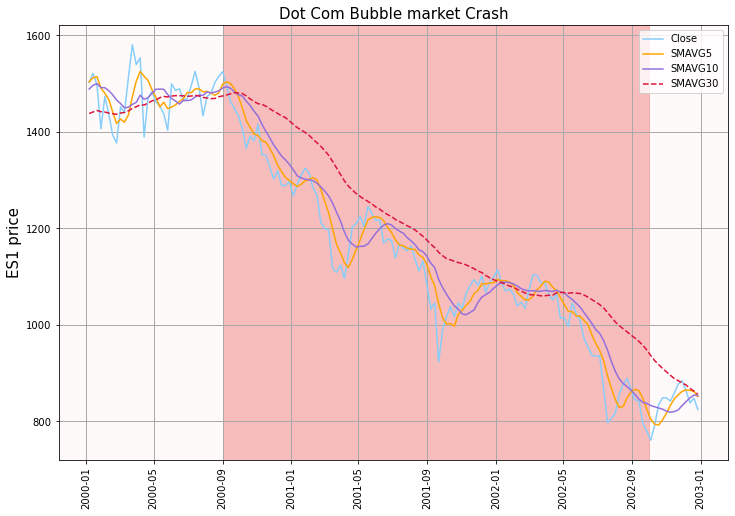

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_facecolor('snow')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.xticks(rotation=90)
plt.ylabel('ES1 price', fontsize=15)
plt.title('Dot Com Bubble market Crash', fontsize=15)
ax.plot(period1['Close'], color='lightskyblue',label="Close")
ax.plot(period1['SMAVG5'], color='orange',label="SMAVG5")
ax.plot(period1['SMAVG10'], color='mediumpurple',label="SMAVG10")
ax.plot(period1['SMAVG30'], color='crimson',linestyle='dashed',label="SMAVG30")
plt.axvspan('2000-09','2002-10', color='lightcoral', alpha=0.5)
plt.legend(loc="upper right")

# Event 2: 2007-2008 Financial Market Crash

The S&P 500 bottomed out in March 2009 during the financial crisis that has come to be known as the Great Recession. The decline was the largest drop in the S&P index since World War II.

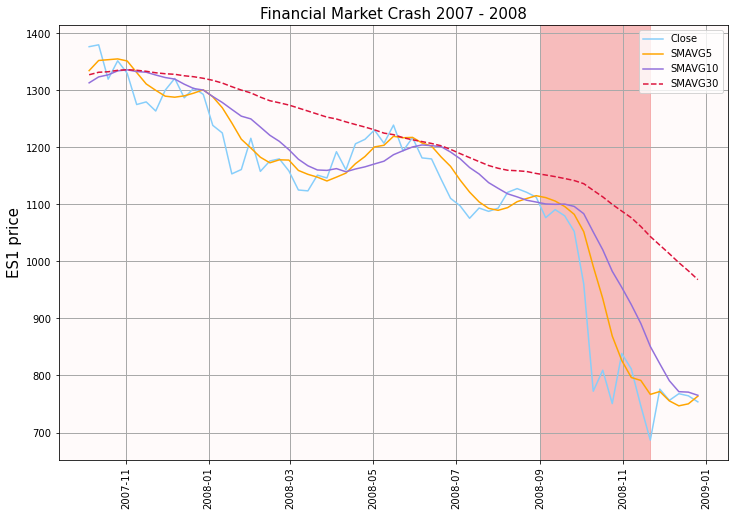

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_facecolor('snow')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.xticks(rotation=90)
plt.ylabel('ES1 price', fontsize=15)
plt.title('Financial Market Crash 2007 - 2008', fontsize=15)
ax.plot(period2['Close'], color='lightskyblue',label="Close")
ax.plot(period2['SMAVG5'], color='orange',label="SMAVG5")
ax.plot(period2['SMAVG10'], color='mediumpurple',label="SMAVG10")
ax.plot(period2['SMAVG30'], color='crimson',linestyle='dashed',label="SMAVG30")
plt.axvspan('2008-09','2008-11-21', color='lightcoral', alpha=0.5)
plt.legend(loc="upper right")

# Event 3: Covid-19 Lockdown

The global spread of Covid-19 in early 2020 led to many countries issuing quarantines in which individuals were ordered to stay home and businesses were ordered to shut down. The expected negative impact on economic growth sent equity markets, such as the S&P 500, into a downfall.

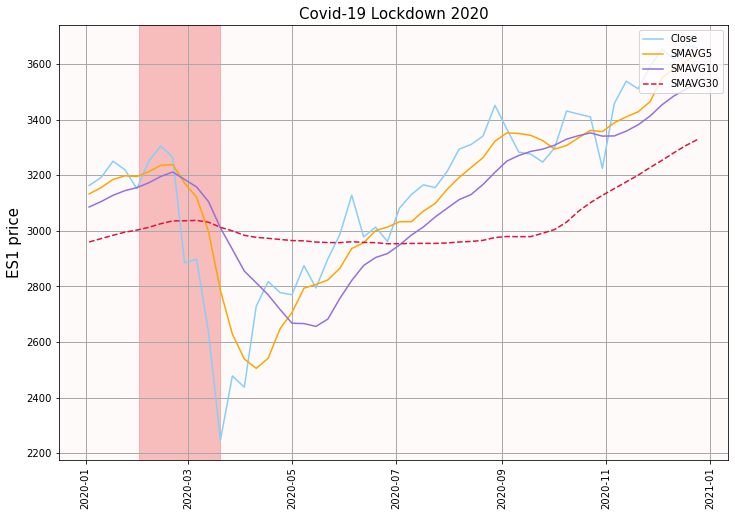

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_facecolor('snow')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.xticks(rotation=90)
plt.ylabel('ES1 price', fontsize=15)
plt.title('Covid-19 Lockdown 2020', fontsize=15)
ax.plot(period3['Close'], color='lightskyblue',label="Close")
ax.plot(period3['SMAVG5'], color='orange',label="SMAVG5")
ax.plot(period3['SMAVG10'], color='mediumpurple',label="SMAVG10")
ax.plot(period3['SMAVG30'], color='crimson',linestyle='dashed',label="SMAVG30")
plt.axvspan('2020-02','2020-03-20', color='lightcoral', alpha=0.5)
plt.legend(loc="upper right")

# Event 4: Ukraine War

The stock market plunged again mid-february 2022 after the Pentagon warned a full-scale Russian invasion of Ukraine could happen imminently and Ukraine declared a state of emergency.

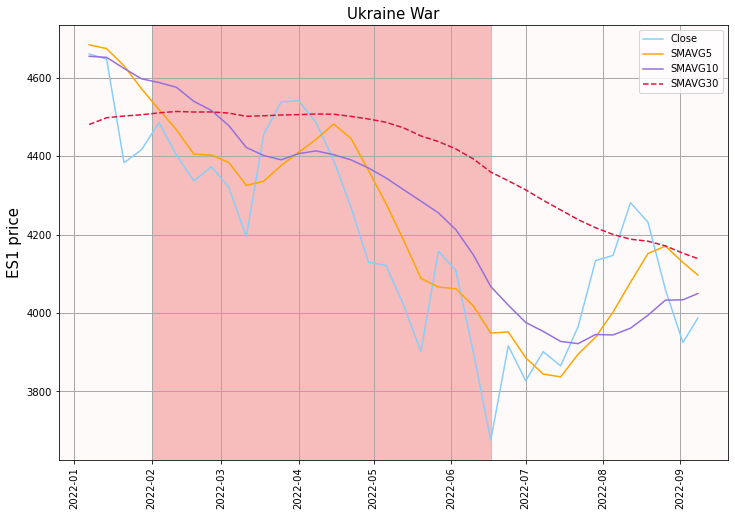

In [156]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_facecolor('snow')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.xticks(rotation=90)
plt.ylabel('ES1 price', fontsize=15)
plt.title('Ukraine War', fontsize=15)
ax.plot(period4['Close'], color='lightskyblue',label="Close")
ax.plot(period4['SMAVG5'], color='orange',label="SMAVG5")
ax.plot(period4['SMAVG10'], color='mediumpurple',label="SMAVG10")
ax.plot(period4['SMAVG30'], color='crimson',linestyle='dashed',label="SMAVG30")
plt.axvspan('2022-02','2022-06-17', color='lightcoral', alpha=0.5)
plt.legend(loc="upper right")

# Time Series forecasting with LSTM for Covid Period

In [30]:
# work path
# df5 = pd.read_csv(r'C:\Users\bloomberg\Downloads\school\es1_daily_2000(without_trender).csv',index_col='Date',parse_dates=True)
# home path
df5 = pd.read_csv(r'C:\Users\Lenovo\Downloads\school\es1_daily_2000(without_trender).csv',index_col='Date',parse_dates=True)
df5 = df5.asfreq('D')
df5.fillna(method='ffill', inplace=True, axis=0)
# df5.head(10)
# df5 = df5.drop('Volume', axis=1)
df5

,Open,High,Low,Close,SMAVG5,SMAVG10,SMAVG30,Volume
Date,,,,,,,,
1999-12-01,1457.63,1470.99,1452.14,1469.16,1476.23,1483.67,1445.29,6980200.0
1999-12-02,1469.16,1479.89,1467.06,1479.37,1473.09,1481.96,1449.35,6698300.0
1999-12-03,1478.85,1521.27,1475.44,1506.08,1477.96,1482.98,1453.91,10045400.0
1999-12-04,1478.85,1521.27,1475.44,1506.08,1477.96,1482.98,1453.91,10045400.0
1999-12-05,1478.85,1521.27,1475.44,1506.08,1477.96,1482.98,1453.91,10045400.0
...,...,...,...,...,...,...,...,...
2022-09-10,4028.24,4095.54,4023.72,4085.50,3995.40,4007.02,4141.08,76706920.0
2022-09-11,4028.24,4095.54,4023.72,4085.50,3995.40,4007.02,4141.08,76706920.0
2022-09-12,4096.00,4137.75,4080.25,4130.00,4032.98,4012.25,4140.35,69256264.0


In [31]:
df5['Open'].fillna(method='ffill', inplace=True)
df5['High'].fillna(method='ffill', inplace=True)
df5['Low'].fillna(method='ffill', inplace=True)
df5['Close'].fillna(method='ffill', inplace=True)
df5['SMAVG5'].fillna(method='ffill', inplace=True)
df5['SMAVG10'].fillna(method='ffill', inplace=True)
df5['SMAVG30'].fillna(method='ffill', inplace=True)

In [32]:
covid2 = df5.loc['2019-01-02':'2020-12-31'] # covid-19
covid2 = covid2.asfreq('D')
covid2 = covid2[['Close']]
# covid2.head(15)

In [33]:
# split data
split_date ='2020-02-20'
covid2_train = covid2.loc[covid2.index <= split_date].copy()
covid2_test = covid2.loc[covid2.index > split_date].copy()

In [34]:
covid2_test

,Close
Date,
2020-02-21,3279.41
2020-02-22,3279.41
2020-02-23,3279.41
2020-02-24,3168.43
2020-02-25,3076.36
...,...
2020-12-27,3675.10
2020-12-28,3707.43
2020-12-29,3699.97


In [35]:
covid2_train

,Close
Date,
2019-01-02,2477.94
2019-01-03,2415.52
2019-01-04,2497.92
2019-01-05,2497.92
2019-01-06,2497.92
...,...
2020-02-16,3320.41
2020-02-17,3320.41
2020-02-18,3308.87


In [36]:
# Data preprocess
training_set = covid2_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

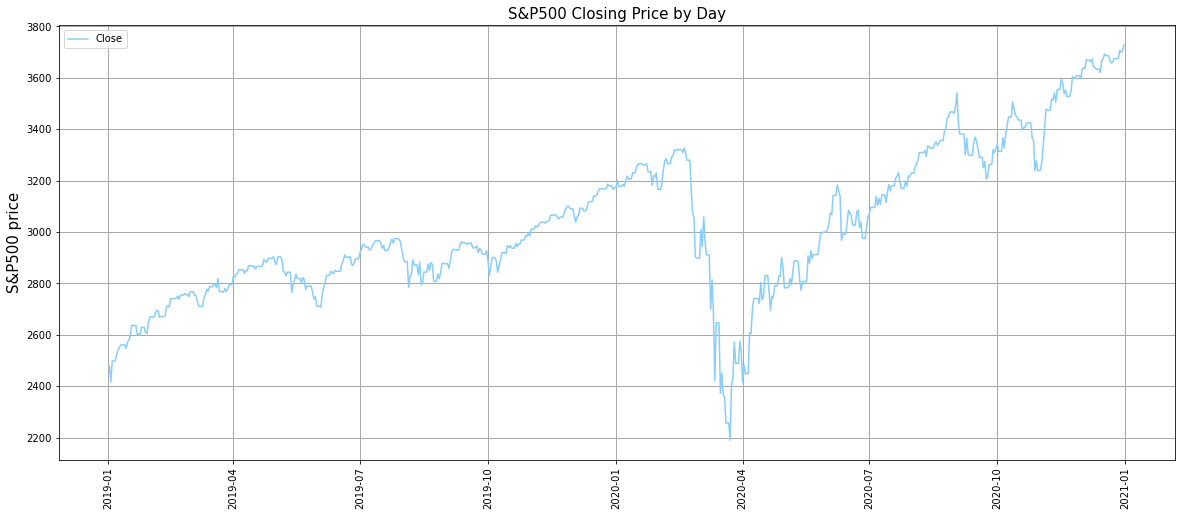

In [38]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.xticks(rotation=90)
plt.ylabel('S&P500 price', fontsize=15)
plt.title('S&P500 Closing Price by Day', fontsize=15)
ax.plot(covid2['Close'], color='lightskyblue',label="Close")
plt.legend(loc="upper left")

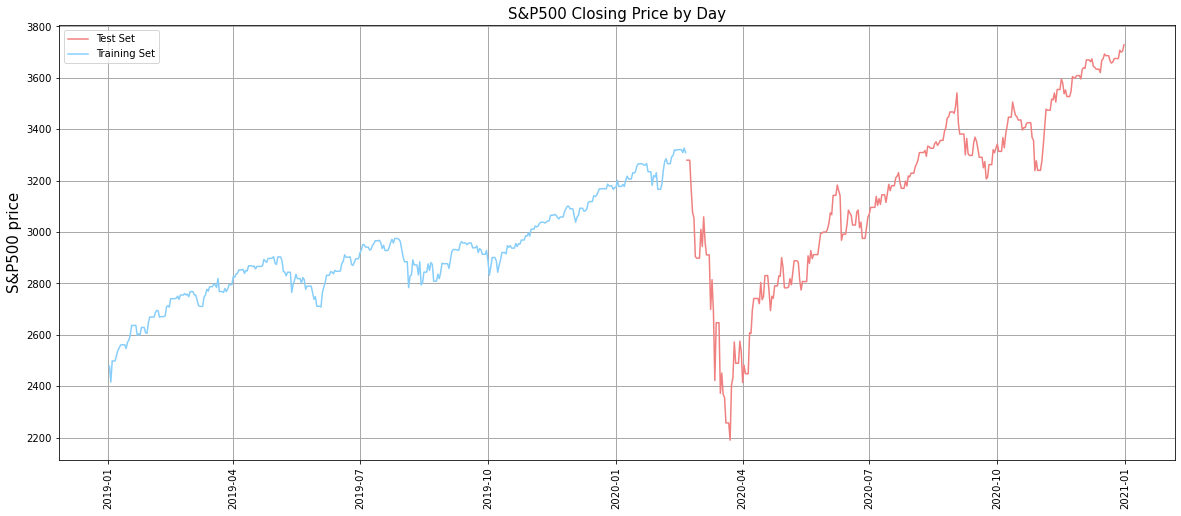

In [47]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.xticks(rotation=90)
plt.ylabel('S&P500 price', fontsize=15)
plt.title('S&P500 Closing Price by Day', fontsize=15)
ax.plot(covid2_test['Close'], color='lightcoral',label="Test Set")
ax.plot(covid2_train['Close'], color='lightskyblue',label="Training Set")
# plt.axvspan('2020-02','2020-03-20', color='lightcoral', alpha=0.5)
plt.legend(loc="upper left")

In [50]:
# !pip install tensorflow

In [51]:
# from tensorflow import keras 

In [40]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation


model = Sequential()
# input layer
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=25, batch_size=50, verbose=2)

Epoch 1/25
9/9 - 1s - loss: 1.0232 - 1s/epoch - 165ms/step
Epoch 2/25
9/9 - 0s - loss: 0.4591 - 36ms/epoch - 4ms/step
Epoch 3/25
9/9 - 0s - loss: 0.1809 - 31ms/epoch - 3ms/step
Epoch 4/25
9/9 - 0s - loss: 0.0817 - 33ms/epoch - 4ms/step
Epoch 5/25
9/9 - 0s - loss: 0.0738 - 36ms/epoch - 4ms/step
Epoch 6/25
9/9 - 0s - loss: 0.0853 - 38ms/epoch - 4ms/step
Epoch 7/25
9/9 - 0s - loss: 0.0846 - 35ms/epoch - 4ms/step
Epoch 8/25
9/9 - 0s - loss: 0.0698 - 35ms/epoch - 4ms/step
Epoch 9/25
9/9 - 0s - loss: 0.0695 - 34ms/epoch - 4ms/step
Epoch 10/25
9/9 - 0s - loss: 0.0775 - 35ms/epoch - 4ms/step
Epoch 11/25
9/9 - 0s - loss: 0.0734 - 39ms/epoch - 4ms/step
Epoch 12/25
9/9 - 0s - loss: 0.0777 - 36ms/epoch - 4ms/step
Epoch 13/25
9/9 - 0s - loss: 0.0684 - 34ms/epoch - 4ms/step
Epoch 14/25
9/9 - 0s - loss: 0.0750 - 35ms/epoch - 4ms/step
Epoch 15/25
9/9 - 0s - loss: 0.0712 - 35ms/epoch - 4ms/step
Epoch 16/25
9/9 - 0s - loss: 0.0795 - 39ms/epoch - 4ms/step
Epoch 17/25
9/9 - 0s - loss: 0.0760 - 36ms/epoch 

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [42]:
test_set = covid2_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_price = model.predict(inputs)
predicted_price = sc.inverse_transform(predicted_price)

10/10 [==============================] - 0s 2ms/step


In [43]:
covid2_test['Closing_Price_Prediction'] = predicted_price
covid2_all = pd.concat([covid2_test, covid2_train], sort=False)

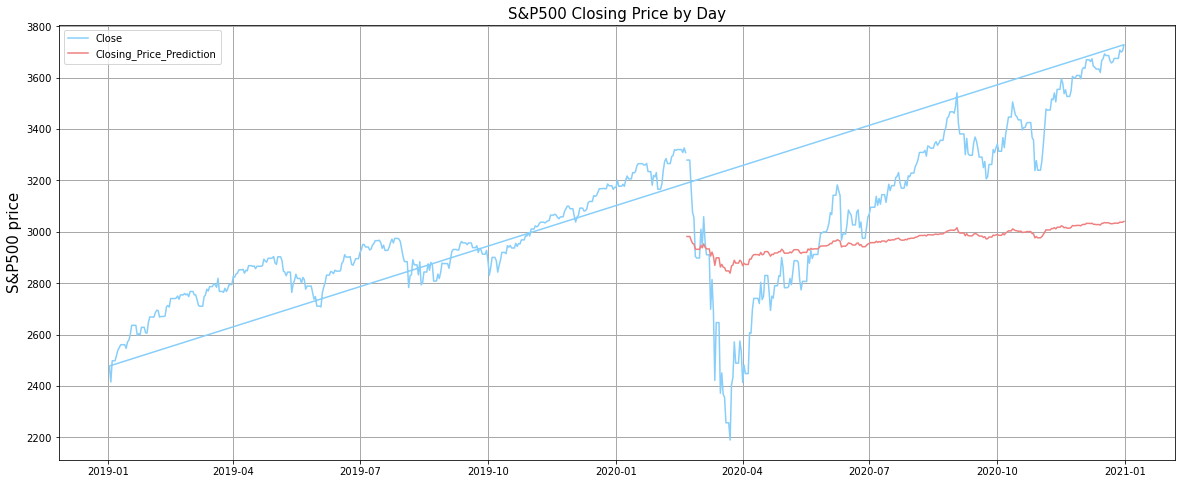

In [46]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
# plt.xticks(rotation=90)
plt.ylabel('S&P500 price', fontsize=15)
plt.title('S&P500 Closing Price by Day', fontsize=15)

ax.plot(covid2_all['Close'], color='lightskyblue',label="Close")
ax.plot(covid2_all['Closing_Price_Prediction'], color='lightcoral',label="Closing_Price_Prediction")
# plt.axvspan('2020-02','2020-03-20', color='lightcoral', alpha=0.5)
plt.legend(loc="upper left")

Text(0.5, 1.0, 'February 2020 Forecast vs Actuals')

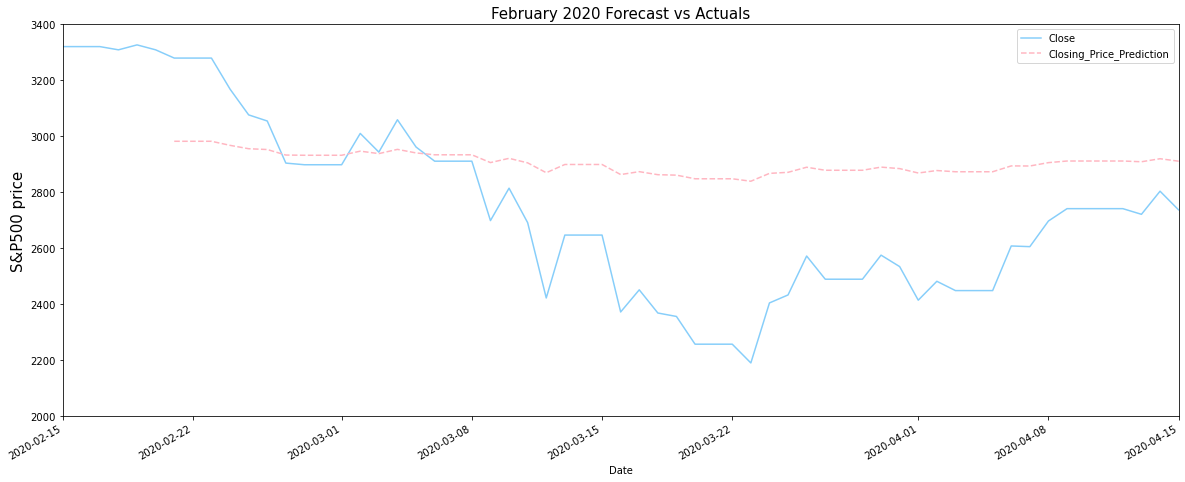

In [72]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
# plt.grid(True, linewidth=1, color = 'darkgrey')
plt.ylabel('S&P500 price', fontsize=15)
_ = covid2_all[['Close','Closing_Price_Prediction']].plot(ax=ax, style=['-','--'], color=['lightskyblue','lightpink'])
ax.set_xbound(lower='2020-02-15', upper='2020-04-15')
ax.set_ylim(2000, 3400)
# plot = plt.title('February 2020 Forecast vs Actuals')
plt.title('February 2020 Forecast vs Actuals', fontsize=15)

In [158]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(y_true=covid2_test['Close'], y_pred=covid2_test['Closing_Price_Prediction']))
mean_absolute_error(y_true=covid2_test['Close'],y_pred=covid2_test['Closing_Price_Prediction'])

#MAE measures the average of all absoulte errors. The absolute average distance between the real data and the predicted data.
#MSE measures the average of the squares of the errors which is the average diffferencve betweenm the estimated values and the actual values

128512.06564934178


304.57945110987106

we can see that the model is underfitting

# Time Series forecasting with LSTM for Ukraine War Period

In [92]:
df7 = pd.read_csv(r'C:\Users\Lenovo\Downloads\school\es1_daily_2000(without_trender).csv',index_col='Date',parse_dates=True)
df7 = df7.asfreq('D')
df7.fillna(method='ffill', inplace=True, axis=0)
# df7.head(10)
df7 = df7.drop('Volume', axis=1)
df7.head(10)

,Open,High,Low,Close,SMAVG5,SMAVG10,SMAVG30
Date,,,,,,,
1999-12-01,1457.63,1470.99,1452.14,1469.16,1476.23,1483.67,1445.29
1999-12-02,1469.16,1479.89,1467.06,1479.37,1473.09,1481.96,1449.35
1999-12-03,1478.85,1521.27,1475.44,1506.08,1477.96,1482.98,1453.91
1999-12-04,1478.85,1521.27,1475.44,1506.08,1477.96,1482.98,1453.91
1999-12-05,1478.85,1521.27,1475.44,1506.08,1477.96,1482.98,1453.91
1999-12-06,1506.08,1510.53,1488.80,1493.25,1481.10,1482.80,1458.25
1999-12-07,1492.73,1499.01,1479.11,1483.04,1486.18,1483.19,1462.80
1999-12-08,1482.51,1485.13,1470.20,1472.30,1486.81,1481.52,1466.29
1999-12-09,1469.46,1486.26,1457.57,1477.73,1486.48,1479.78,1468.40


In [93]:
df7['Open'].fillna(method='ffill', inplace=True)
df7['High'].fillna(method='ffill', inplace=True)
df7['Low'].fillna(method='ffill', inplace=True)
df7['Close'].fillna(method='ffill', inplace=True)
df7['SMAVG5'].fillna(method='ffill', inplace=True)
df7['SMAVG10'].fillna(method='ffill', inplace=True)
df7['SMAVG30'].fillna(method='ffill', inplace=True)

In [122]:
ukraine = df7.loc['2022-01-07':] # covid-19
ukraine = ukraine.asfreq('D')
ukraine = ukraine[['Close']]
ukraine

,Close
Date,
2022-01-07,4681.17
2022-01-08,4681.17
2022-01-09,4681.17
2022-01-10,4675.66
2022-01-11,4718.53
...,...
2022-09-10,4085.50
2022-09-11,4085.50
2022-09-12,4130.00


In [95]:
split_date ='2022-04'
ukraine_train = ukraine.loc[ukraine.index <= split_date].copy()
ukraine_test = ukraine.loc[ukraine.index > split_date].copy()

In [98]:
# ukraine_test

In [99]:
training_set2 = ukraine_train.values
training_set2 = np.reshape(training_set2, (len(training_set2), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set2 = sc.fit_transform(training_set2)
X_train2 = training_set2[0:len(training_set2)-1]
y_train2 = training_set2[1:len(training_set2)]
X_train2 = np.reshape(X_train2, (len(X_train2), 1, 1))

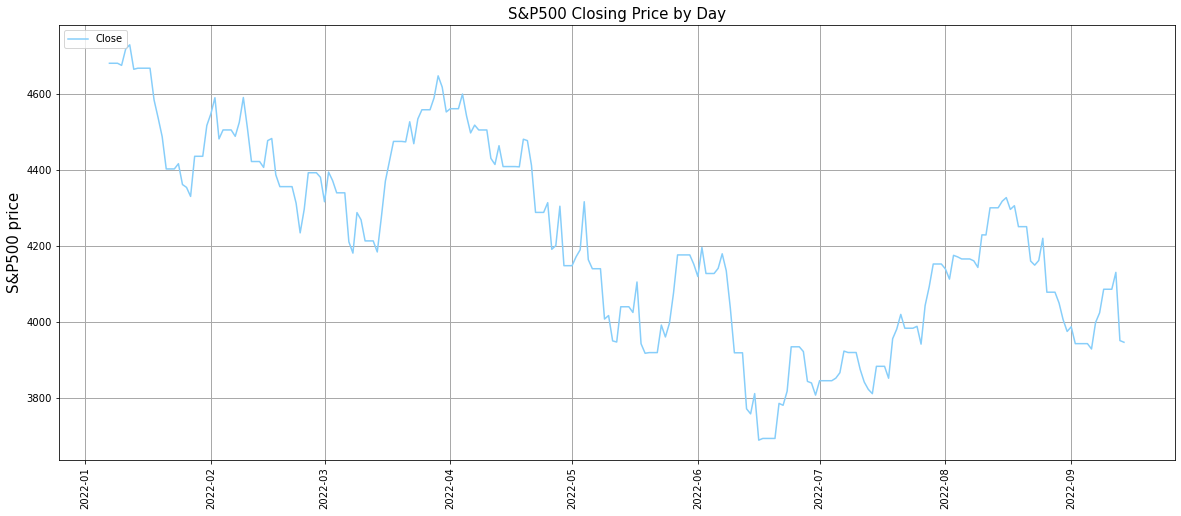

In [100]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.xticks(rotation=90)
plt.ylabel('S&P500 price', fontsize=15)
plt.title('S&P500 Closing Price by Day', fontsize=15)
ax.plot(ukraine['Close'], color='lightskyblue',label="Close")
plt.legend(loc="upper left")

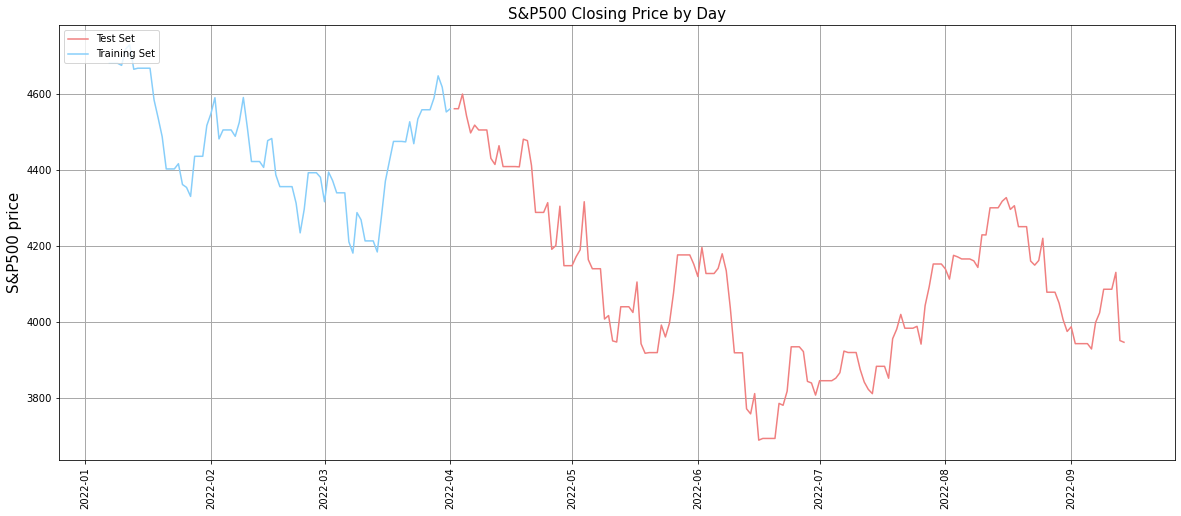

In [101]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.xticks(rotation=90)
plt.ylabel('S&P500 price', fontsize=15)
plt.title('S&P500 Closing Price by Day', fontsize=15)
ax.plot(ukraine_test['Close'], color='lightcoral',label="Test Set")
ax.plot(ukraine_train['Close'], color='lightskyblue',label="Training Set")
plt.legend(loc="upper left")

In [102]:
model2 = Sequential()
# input layer
model2.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model2.add(Dropout(0.2))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam')
model2.fit(X_train2, y_train2, epochs=25, batch_size=50, verbose=2)

Epoch 1/25
2/2 - 2s - loss: 0.1408 - 2s/epoch - 877ms/step
Epoch 2/25
2/2 - 0s - loss: 0.0931 - 13ms/epoch - 6ms/step
Epoch 3/25
2/2 - 0s - loss: 0.1089 - 11ms/epoch - 5ms/step
Epoch 4/25
2/2 - 0s - loss: 0.1134 - 14ms/epoch - 7ms/step
Epoch 5/25
2/2 - 0s - loss: 0.1090 - 9ms/epoch - 4ms/step
Epoch 6/25
2/2 - 0s - loss: 0.1068 - 10ms/epoch - 5ms/step
Epoch 7/25
2/2 - 0s - loss: 0.0973 - 9ms/epoch - 4ms/step
Epoch 8/25
2/2 - 0s - loss: 0.0992 - 10ms/epoch - 5ms/step
Epoch 9/25
2/2 - 0s - loss: 0.1059 - 10ms/epoch - 5ms/step
Epoch 10/25
2/2 - 0s - loss: 0.0989 - 9ms/epoch - 4ms/step
Epoch 11/25
2/2 - 0s - loss: 0.0727 - 9ms/epoch - 4ms/step
Epoch 12/25
2/2 - 0s - loss: 0.1021 - 14ms/epoch - 7ms/step
Epoch 13/25
2/2 - 0s - loss: 0.1094 - 14ms/epoch - 7ms/step
Epoch 14/25
2/2 - 0s - loss: 0.0856 - 12ms/epoch - 6ms/step
Epoch 15/25
2/2 - 0s - loss: 0.0991 - 13ms/epoch - 6ms/step
Epoch 16/25
2/2 - 0s - loss: 0.0873 - 13ms/epoch - 6ms/step
Epoch 17/25
2/2 - 0s - loss: 0.1069 - 11ms/epoch - 5m

In [103]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [104]:
test_set2 = ukraine_test.values
inputs2 = np.reshape(test_set2, (len(test_set2), 1))
inputs2 = sc.transform(inputs2)
inputs2 = np.reshape(inputs2, (len(inputs2), 1, 1))
predicted_price2 = model2.predict(inputs2)
predicted_price2 = sc.inverse_transform(predicted_price2)

6/6 [==============================] - 0s 3ms/step


In [105]:
ukraine_test['Closing_Price_Prediction'] = predicted_price2
ukraine_all = pd.concat([ukraine_test, ukraine_train], sort=False)

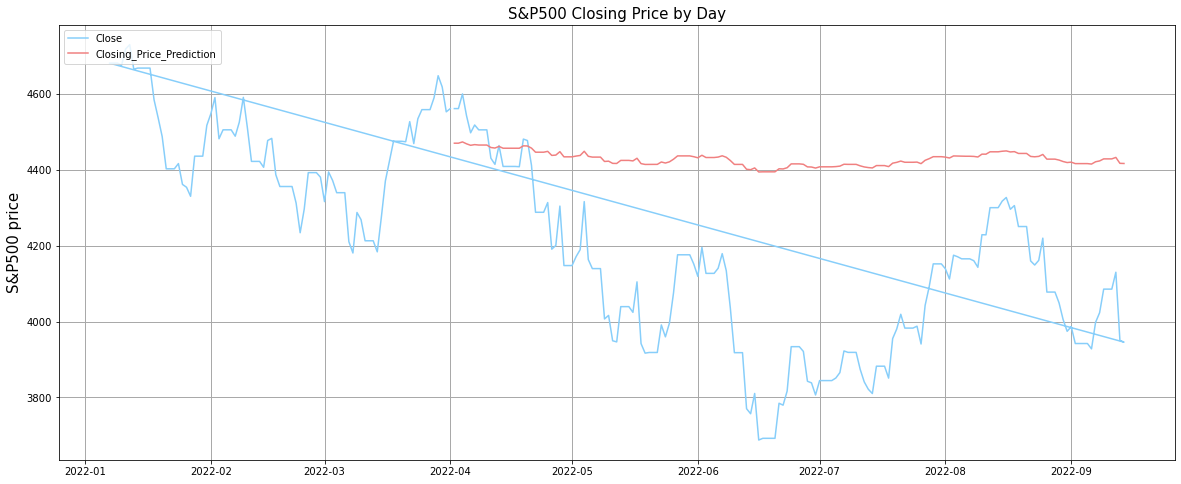

In [107]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.ylabel('S&P500 price', fontsize=15)
plt.title('S&P500 Closing Price by Day', fontsize=15)

ax.plot(ukraine_all['Close'], color='lightskyblue',label="Close")
ax.plot(ukraine_all['Closing_Price_Prediction'], color='lightcoral',label="Closing_Price_Prediction")
plt.legend(loc="upper left")

Text(0.5, 1.0, 'April 2022 Forecast vs Actuals')

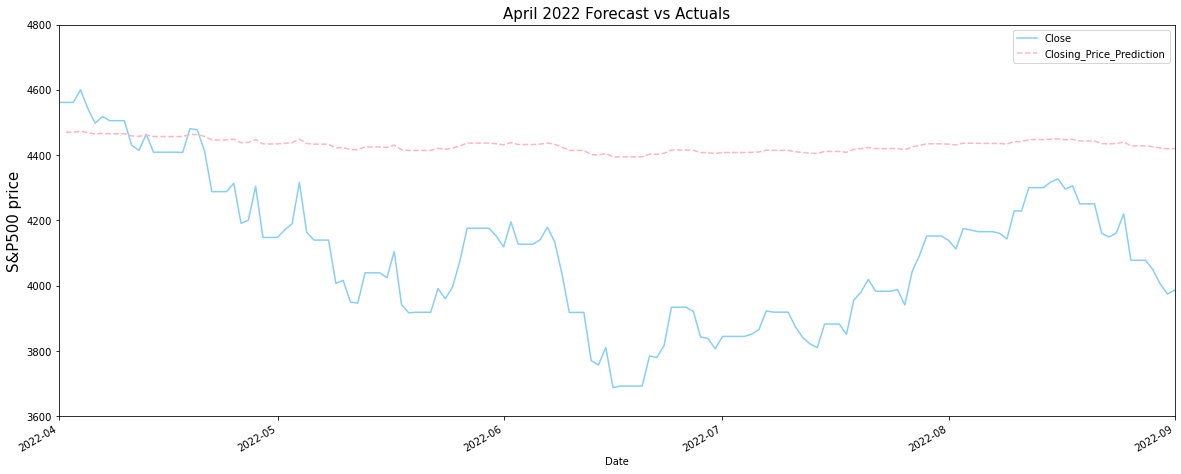

In [110]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.ylabel('S&P500 price', fontsize=15)
_ = ukraine_all[['Close','Closing_Price_Prediction']].plot(ax=ax, style=['-','--'], color=['lightskyblue','lightpink'])
ax.set_xbound(lower='2022-04-01', upper='2022-09-01')
ax.set_ylim(3600, 4800)
# plot = plt.title('February 2020 Forecast vs Actuals')
plt.title('April 2022 Forecast vs Actuals', fontsize=15)

In [113]:
# Mean Squared Error and Mean Absolute Error
print(mean_squared_error(y_true=ukraine_test['Close'], y_pred=ukraine_test['Closing_Price_Prediction']))
mean_absolute_error(y_true=ukraine_test['Close'],y_pred=ukraine_test['Closing_Price_Prediction'])

151583.51124726172


347.4155526402485

We can see that the model is underfitted

# Time Series forecasting with LSTM for Financial Market Crash 2007-2008 Period

In [125]:
df8 = pd.read_csv(r'C:\Users\Lenovo\Downloads\school\es1_daily_2000(without_trender).csv',index_col='Date',parse_dates=True)
df8 = df8.asfreq('D')
df8.fillna(method='ffill', inplace=True, axis=0)

crash = df8.loc['2008-05-01':'2009-01-01']
crash = crash.asfreq('D')
crash = crash[['Close']]
crash

,Close
Date,
2008-05-01,1232.41
2008-05-02,1236.12
2008-05-03,1236.12
2008-05-04,1236.12
2008-05-05,1229.57
...,...
2008-12-28,757.12
2008-12-29,758.43
2008-12-30,773.89


In [126]:
split_date ='2008-09'
crash_train = crash.loc[crash.index <= split_date].copy()
crash_test = crash.loc[crash.index > split_date].copy()

In [128]:
training_set3 = crash_train.values
training_set3 = np.reshape(training_set3, (len(training_set3), 1))

sc = MinMaxScaler()
training_set3 = sc.fit_transform(training_set3)
X_train3 = training_set3[0:len(training_set3)-1]
y_train3 = training_set3[1:len(training_set3)]
X_train3 = np.reshape(X_train3, (len(X_train3), 1, 1))

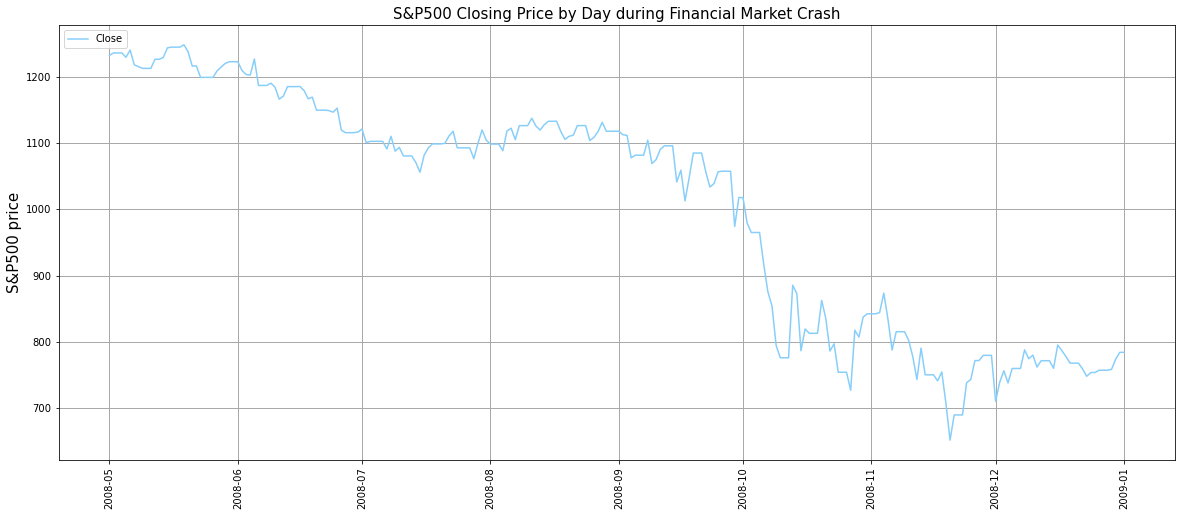

In [130]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.xticks(rotation=90)
plt.ylabel('S&P500 price', fontsize=15)
plt.title('S&P500 Closing Price by Day during Financial Market Crash', fontsize=15)
ax.plot(crash['Close'], color='lightskyblue',label="Close")
plt.legend(loc="upper left")

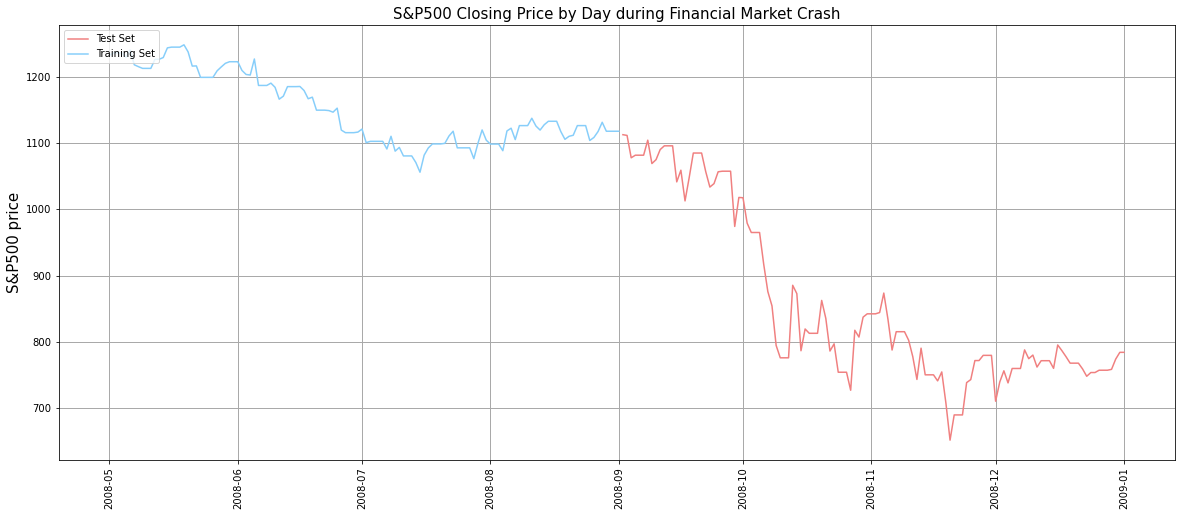

In [131]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.xticks(rotation=90)
plt.ylabel('S&P500 price', fontsize=15)
plt.title('S&P500 Closing Price by Day during Financial Market Crash', fontsize=15)
ax.plot(crash_test['Close'], color='lightcoral',label="Test Set")
ax.plot(crash_train['Close'], color='lightskyblue',label="Training Set")
plt.legend(loc="upper left")

In [132]:
model3 = Sequential()
# input layer
model3.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model3.add(Dropout(0.2))
model3.add(Dense(1))
model3.compile(loss='mean_squared_error', optimizer='adam')
model3.fit(X_train3, y_train3, epochs=25, batch_size=50, verbose=2)

Epoch 1/25
3/3 - 1s - loss: 0.2110 - 1s/epoch - 449ms/step
Epoch 2/25
3/3 - 0s - loss: 0.1394 - 13ms/epoch - 4ms/step
Epoch 3/25
3/3 - 0s - loss: 0.1073 - 12ms/epoch - 4ms/step
Epoch 4/25
3/3 - 0s - loss: 0.0867 - 14ms/epoch - 5ms/step
Epoch 5/25
3/3 - 0s - loss: 0.0920 - 12ms/epoch - 4ms/step
Epoch 6/25
3/3 - 0s - loss: 0.1307 - 16ms/epoch - 5ms/step
Epoch 7/25
3/3 - 0s - loss: 0.1161 - 11ms/epoch - 4ms/step
Epoch 8/25
3/3 - 0s - loss: 0.1145 - 13ms/epoch - 4ms/step
Epoch 9/25
3/3 - 0s - loss: 0.1016 - 13ms/epoch - 4ms/step
Epoch 10/25
3/3 - 0s - loss: 0.0958 - 12ms/epoch - 4ms/step
Epoch 11/25
3/3 - 0s - loss: 0.1110 - 16ms/epoch - 5ms/step
Epoch 12/25
3/3 - 0s - loss: 0.0902 - 12ms/epoch - 4ms/step
Epoch 13/25
3/3 - 0s - loss: 0.0878 - 15ms/epoch - 5ms/step
Epoch 14/25
3/3 - 0s - loss: 0.1073 - 13ms/epoch - 4ms/step
Epoch 15/25
3/3 - 0s - loss: 0.1169 - 12ms/epoch - 4ms/step
Epoch 16/25
3/3 - 0s - loss: 0.0996 - 16ms/epoch - 5ms/step
Epoch 17/25
3/3 - 0s - loss: 0.0913 - 11ms/epoch 

In [133]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [134]:
test_set3 = crash_test.values
inputs3 = np.reshape(test_set3, (len(test_set3), 1))
inputs3 = sc.transform(inputs3)
inputs3 = np.reshape(inputs3, (len(inputs3), 1, 1))
predicted_price3 = model3.predict(inputs3)
predicted_price3 = sc.inverse_transform(predicted_price3)

4/4 [==============================] - 0s 3ms/step


In [135]:
crash_test['Closing_Price_Prediction'] = predicted_price3
crash_all = pd.concat([crash_test, crash_train], sort=False)

In [136]:
final_data3 = crash_all
final_data3 = final_data3.reset_index()
final_data3 = final_data3.rename(columns={'Closing_Price_Prediction': 'lstm'})
final_data3 = final_data3[['Date','Close','lstm']]

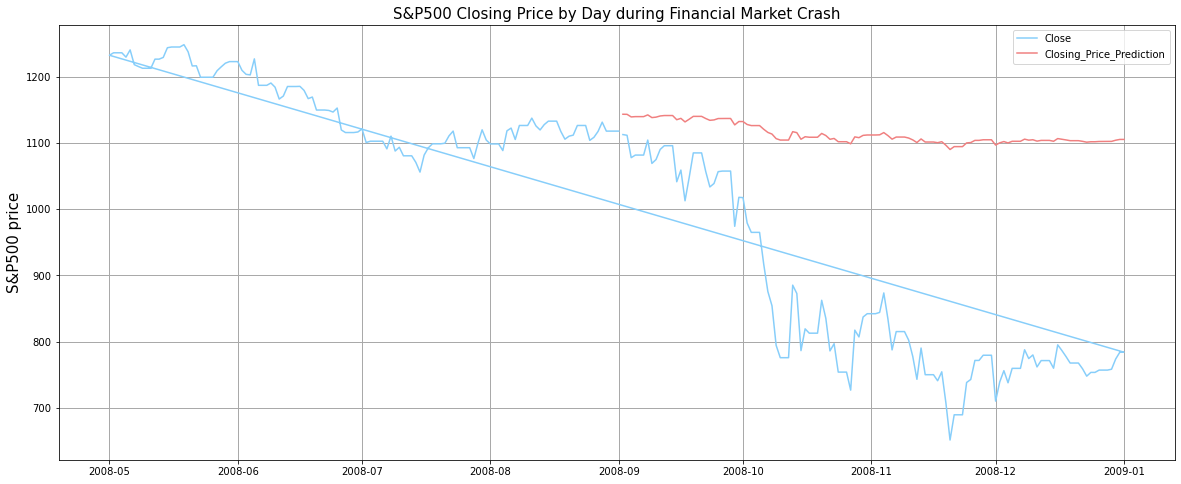

In [138]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.ylabel('S&P500 price', fontsize=15)
plt.title('S&P500 Closing Price by Day during Financial Market Crash', fontsize=15)

ax.plot(crash_all['Close'], color='lightskyblue',label="Close")
ax.plot(crash_all['Closing_Price_Prediction'], color='lightcoral',label="Closing_Price_Prediction")
plt.legend(loc="upper right")

Text(0.5, 1.0, 'S&P500 Closing Price by Day during Financial Market Crash')

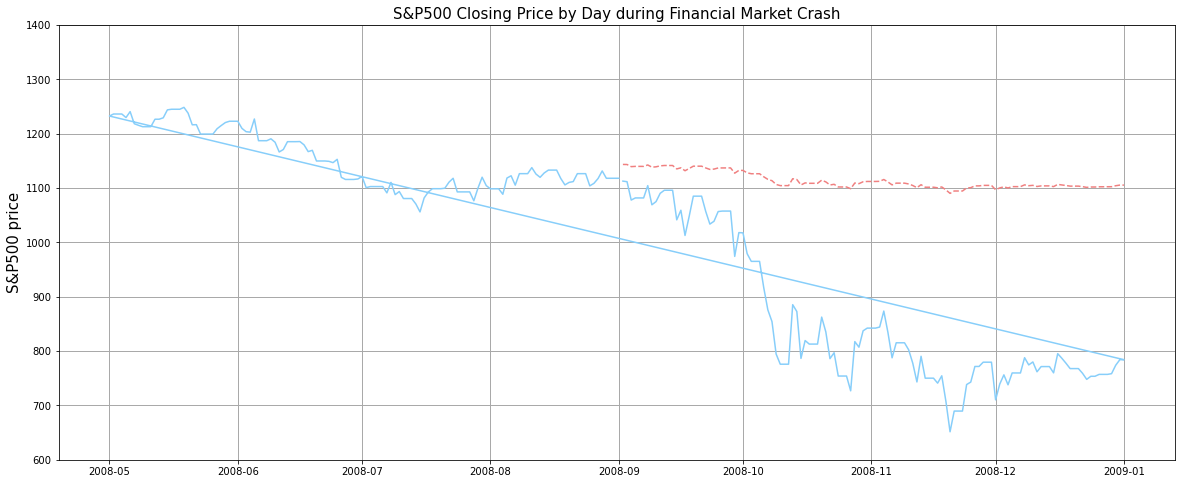

In [151]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.ylabel('S&P500 price', fontsize=15)

ax.plot(crash_all['Close'], color='lightskyblue',label="Close")
ax.plot(crash_all['Closing_Price_Prediction'], color='lightcoral',label="Closing_Price_Prediction",linestyle='dashed')
# _ = crash_all[['Close','Closing_Price_Prediction']].plot(ax=ax, style=['-','--'], color=['lightskyblue','lightpink'])
# ax.set_xbound(lower='2008-09', upper='2009-01-01')
ax.set_ylim(600, 1400)
plt.title('S&P500 Closing Price by Day during Financial Market Crash', fontsize=15)

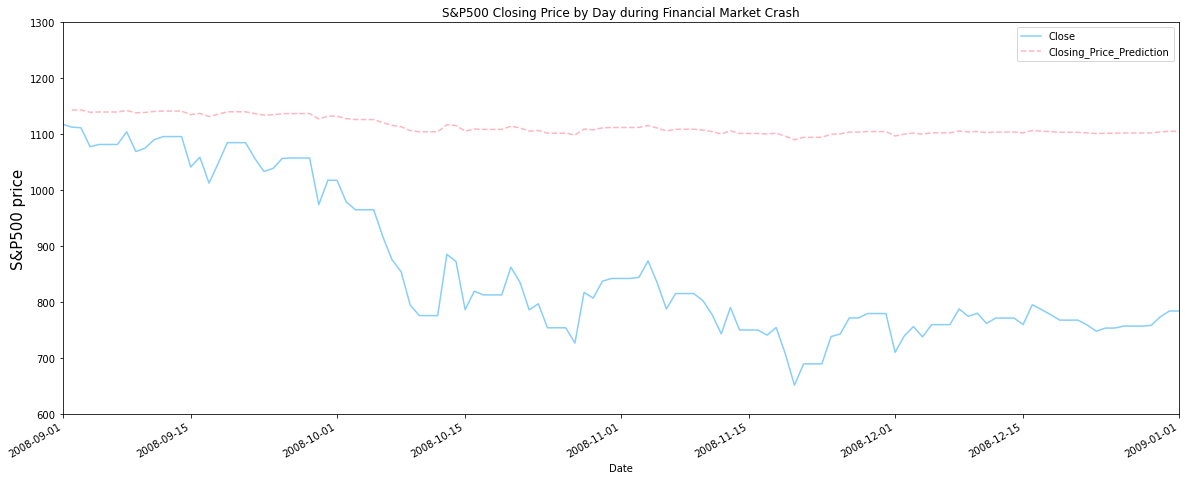

In [154]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.ylabel('S&P500 price', fontsize=15)
_ = crash_all[['Close','Closing_Price_Prediction']].plot(ax=ax, style=['-','--'], color=['lightskyblue','lightpink'])
ax.set_xbound(lower='2008-09-01', upper='2009-01-01')
ax.set_ylim(600, 1300)
plot = plt.title('S&P500 Closing Price by Day during Financial Market Crash')

In [155]:
# Mean Squared Error and Mean Absolute Error
print(mean_squared_error(y_true=crash_test['Close'], y_pred=crash_test['Closing_Price_Prediction']))
mean_absolute_error(y_true=crash_test['Close'],y_pred=crash_test['Closing_Price_Prediction'])

79239.57484726346


256.7954276463243

We can see that the model is underfitted

# Time Series forecasting with LSTM for Dot Com Bubble Crash 2000-2002

In [176]:
df9 = pd.read_csv(r'C:\Users\Lenovo\Downloads\school\es1_daily_2000(without_trender).csv',index_col='Date',parse_dates=True)
df9 = df9.asfreq('D')
df9.fillna(method='ffill', inplace=True, axis=0)

bubble = df9.loc['2000-01-07':'2002-12-27']
bubble = bubble.asfreq('D')
bubble = bubble[['Close']]
bubble

,Close
Date,
2000-01-07,1509.26
2000-01-08,1509.26
2000-01-09,1509.26
2000-01-10,1525.03
2000-01-11,1503.58
...,...
2002-12-23,852.26
2002-12-24,847.03
2002-12-25,847.03


In [177]:
split_date ='2000-09'
bubble_train = bubble.loc[bubble.index <= split_date].copy()
bubble_test = bubble.loc[bubble.index > split_date].copy()

In [178]:
training_set4 = bubble_train.values
training_set4 = np.reshape(training_set4, (len(training_set4), 1))

sc = MinMaxScaler()
training_set4 = sc.fit_transform(training_set4)
X_train4 = training_set4[0:len(training_set4)-1]
y_train4 = training_set4[1:len(training_set4)]
X_train4 = np.reshape(X_train4, (len(X_train4), 1, 1))

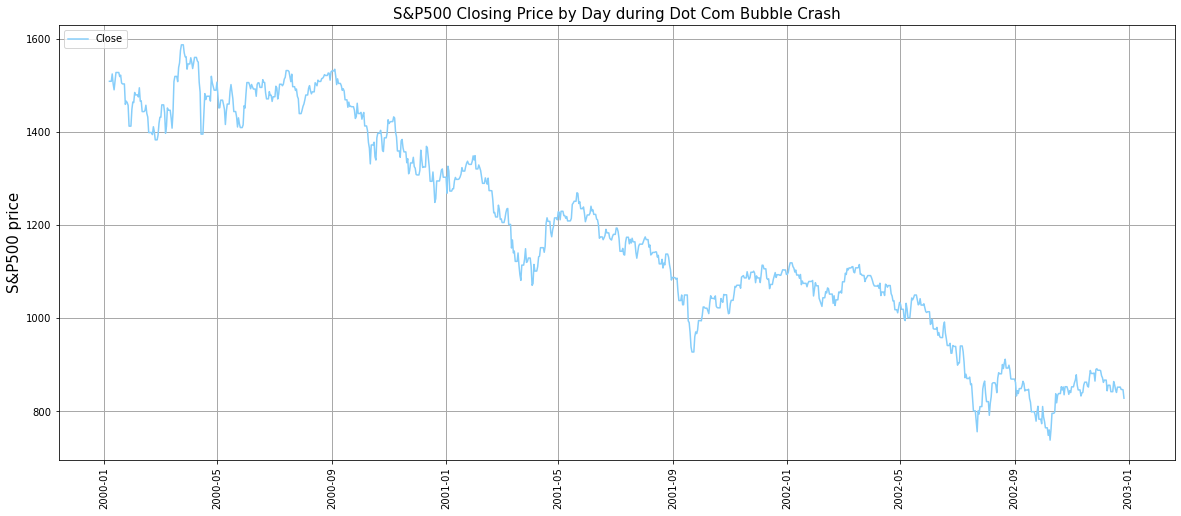

In [179]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.xticks(rotation=90)
plt.ylabel('S&P500 price', fontsize=15)
plt.title('S&P500 Closing Price by Day during Dot Com Bubble Crash', fontsize=15)
ax.plot(bubble['Close'], color='lightskyblue',label="Close")
plt.legend(loc="upper left")

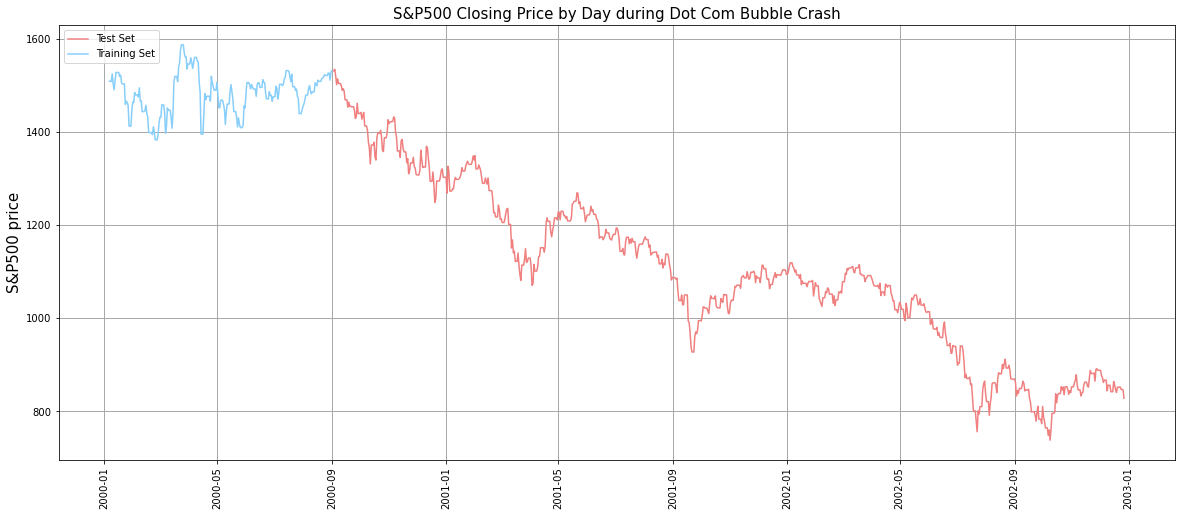

In [180]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.xticks(rotation=90)
plt.ylabel('S&P500 price', fontsize=15)
plt.title('S&P500 Closing Price by Day during Dot Com Bubble Crash', fontsize=15)
ax.plot(bubble_test['Close'], color='lightcoral',label="Test Set")
ax.plot(bubble_train['Close'], color='lightskyblue',label="Training Set")
plt.legend(loc="upper left")

In [181]:
model4 = Sequential()
# input layer
model4.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model4.add(Dropout(0.2))
model4.add(Dense(1))
model4.compile(loss='mean_squared_error', optimizer='adam')
model4.fit(X_train4, y_train4, epochs=25, batch_size=50, verbose=2)

Epoch 1/25
5/5 - 2s - loss: 0.1008 - 2s/epoch - 311ms/step
Epoch 2/25
5/5 - 0s - loss: 0.0893 - 19ms/epoch - 4ms/step
Epoch 3/25
5/5 - 0s - loss: 0.0975 - 17ms/epoch - 3ms/step
Epoch 4/25
5/5 - 0s - loss: 0.0917 - 18ms/epoch - 4ms/step
Epoch 5/25
5/5 - 0s - loss: 0.0840 - 23ms/epoch - 5ms/step
Epoch 6/25
5/5 - 0s - loss: 0.0888 - 39ms/epoch - 8ms/step
Epoch 7/25
5/5 - 0s - loss: 0.0795 - 32ms/epoch - 6ms/step
Epoch 8/25
5/5 - 0s - loss: 0.0849 - 19ms/epoch - 4ms/step
Epoch 9/25
5/5 - 0s - loss: 0.0774 - 25ms/epoch - 5ms/step
Epoch 10/25
5/5 - 0s - loss: 0.0763 - 28ms/epoch - 6ms/step
Epoch 11/25
5/5 - 0s - loss: 0.0808 - 22ms/epoch - 4ms/step
Epoch 12/25
5/5 - 0s - loss: 0.0791 - 20ms/epoch - 4ms/step
Epoch 13/25
5/5 - 0s - loss: 0.0772 - 19ms/epoch - 4ms/step
Epoch 14/25
5/5 - 0s - loss: 0.0776 - 19ms/epoch - 4ms/step
Epoch 15/25
5/5 - 0s - loss: 0.0769 - 19ms/epoch - 4ms/step
Epoch 16/25
5/5 - 0s - loss: 0.0656 - 18ms/epoch - 4ms/step
Epoch 17/25
5/5 - 0s - loss: 0.0663 - 19ms/epoch 

In [182]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [183]:
test_set4 = bubble_test.values
inputs4 = np.reshape(test_set4, (len(test_set4), 1))
inputs4 = sc.transform(inputs4)
inputs4 = np.reshape(inputs4, (len(inputs4), 1, 1))
predicted_price4 = model4.predict(inputs4)
predicted_price4 = sc.inverse_transform(predicted_price4)

27/27 [==============================] - 0s 2ms/step


In [184]:
bubble_test['Closing_Price_Prediction'] = predicted_price4
bubble_all = pd.concat([bubble_test, bubble_train], sort=False)

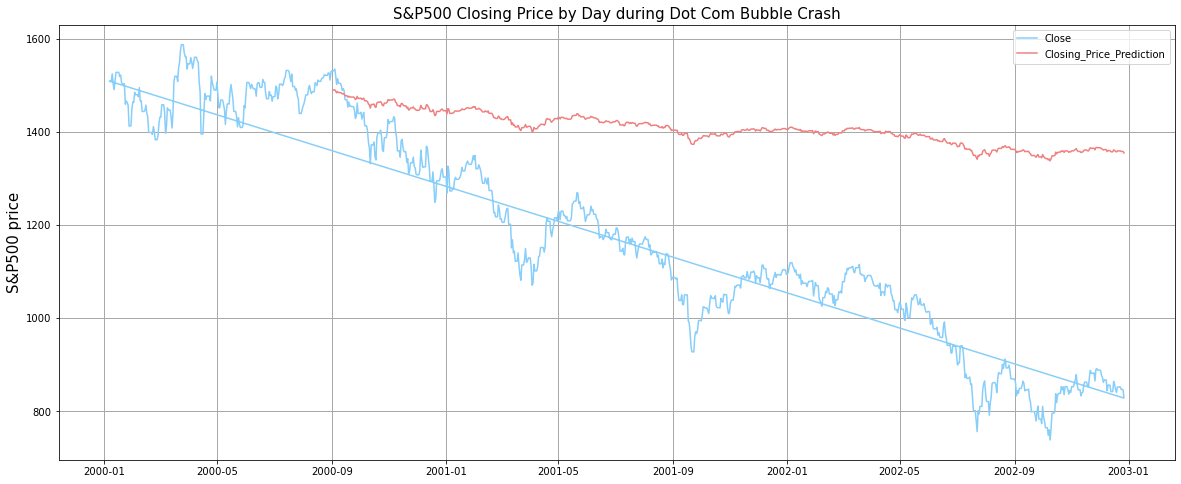

In [185]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.ylabel('S&P500 price', fontsize=15)
plt.title('S&P500 Closing Price by Day during Dot Com Bubble Crash', fontsize=15)

ax.plot(bubble_all['Close'], color='lightskyblue',label="Close")
ax.plot(bubble_all['Closing_Price_Prediction'], color='lightcoral',label="Closing_Price_Prediction")
plt.legend(loc="upper right")

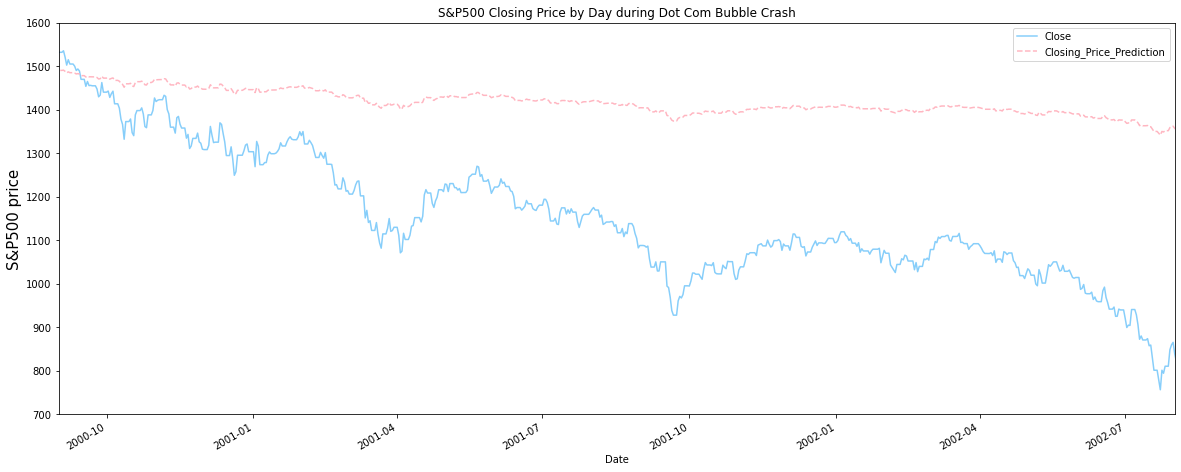

In [187]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.ylabel('S&P500 price', fontsize=15)
_ = bubble_all[['Close','Closing_Price_Prediction']].plot(ax=ax, style=['-','--'], color=['lightskyblue','lightpink'])
ax.set_xbound(lower='2000-09-01', upper='2002-08-01')
ax.set_ylim(700, 1600)
plot = plt.title('S&P500 Closing Price by Day during Dot Com Bubble Crash')

In [188]:
# Mean Squared Error and Mean Absolute Error
print(mean_squared_error(y_true=bubble_test['Close'], y_pred=bubble_test['Closing_Price_Prediction']))
mean_absolute_error(y_true=bubble_test['Close'],y_pred=bubble_test['Closing_Price_Prediction'])
#the mdoe is underfitting

115886.15196904143


308.6492213384095

# Time Series forecasting between 2000 and 2022 using Arima

In [160]:
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

In [161]:
# work path
# df6 = pd.read_csv(r'C:\Users\bloomberg\Downloads\school\es1_daily_2000(without_trender).csv',index_col='Date',parse_dates=True)
# home path
df6 = pd.read_csv(r'C:\Users\Lenovo\Downloads\school\es1_daily_2000(without_trender).csv',index_col='Date',parse_dates=True)


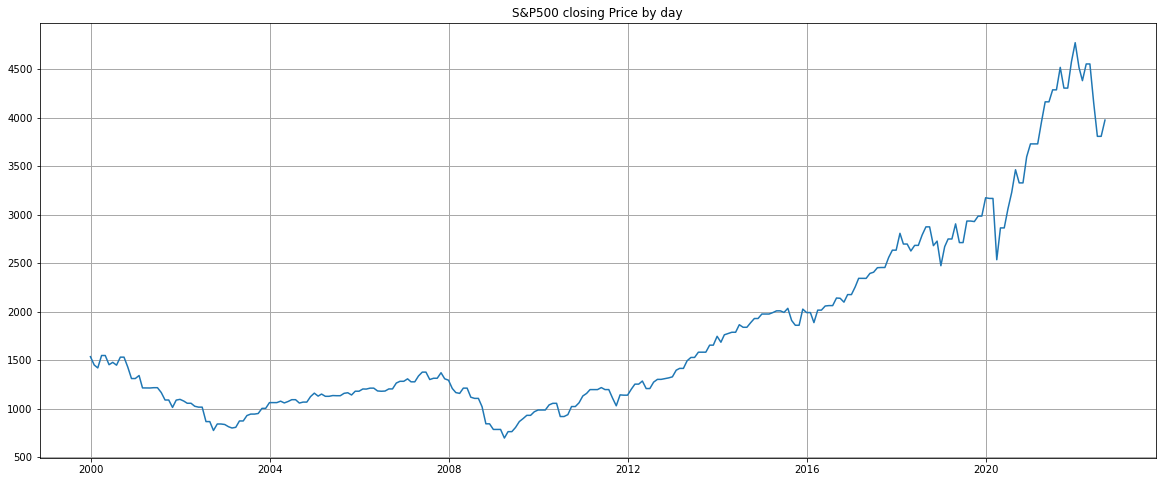

In [191]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set_facecolor('white')
plt.grid(True, linewidth=1, color = 'darkgrey')
plt.title('S&P500 closing Price by day')
plt.plot(df6.Close, '-', label='By day')

In [163]:
# work path
# df6 = pd.read_csv(r'C:\Users\bloomberg\Downloads\school\es1_daily_2000(without_trender).csv',index_col='Date',parse_dates=True)
# home path
df6 = pd.read_csv(r'C:\Users\Lenovo\Downloads\school\es1_daily_2000(without_trender).csv',index_col='Date',parse_dates=True)

df6 = df6.asfreq('M')
df6.fillna(method='ffill', inplace=True, axis=0)
df6.head(10)

,Open,High,Low,Close,SMAVG5,SMAVG10,SMAVG30,Volume
Date,,,,,,,,
1999-12-31,1530.97,1539.25,1526.06,1534.59,1530.97,1517.33,1494.40,3172700.0
2000-01-31,1411.56,1450.59,1403.03,1448.52,1449.81,1475.97,1496.25,10768700.0
2000-02-29,1395.01,1420.60,1393.72,1418.54,1401.63,1413.24,1452.69,8242500.0
2000-03-31,1536.35,1570.54,1532.01,1546.55,1555.23,1553.57,1470.71,9249100.0
2000-04-30,1536.35,1570.54,1532.01,1546.55,1555.23,1553.57,1470.71,9249100.0
2000-05-31,1456.73,1468.73,1448.82,1451.63,1430.30,1434.20,1461.24,6056500.0
2000-06-30,1464.45,1479.03,1462.94,1476.02,1477.47,1486.98,1475.26,7420200.0
2000-07-31,1439.32,1457.16,1436.55,1446.86,1465.61,1486.80,1492.39,5265500.0
2000-08-31,1512.71,1537.85,1511.96,1529.56,1523.32,1519.83,1495.04,4863100.0


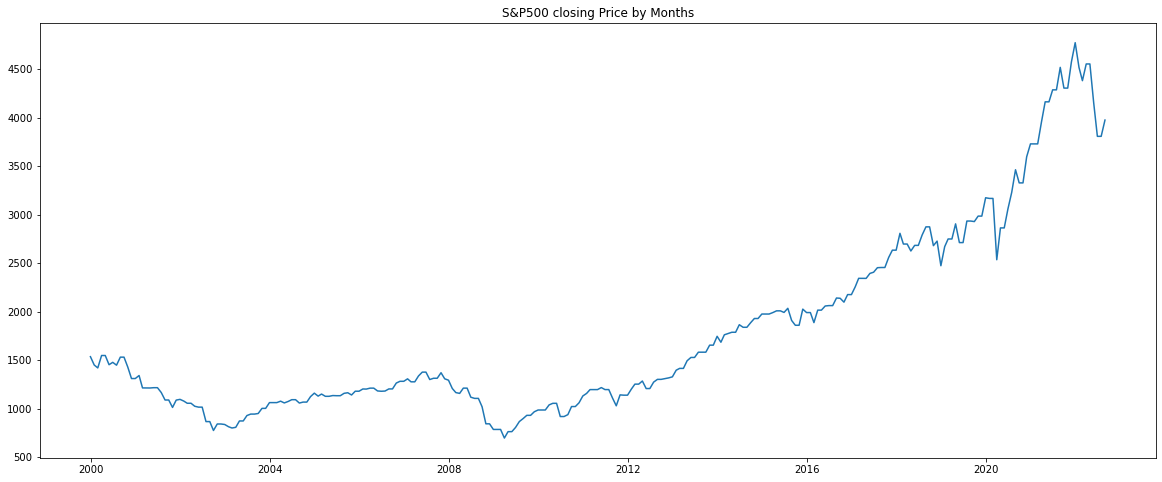

In [164]:
plt.figure(figsize=[20,8])
plt.title('S&P500 closing Price by Months')
plt.plot(df6.Close, '-', label='By Months')

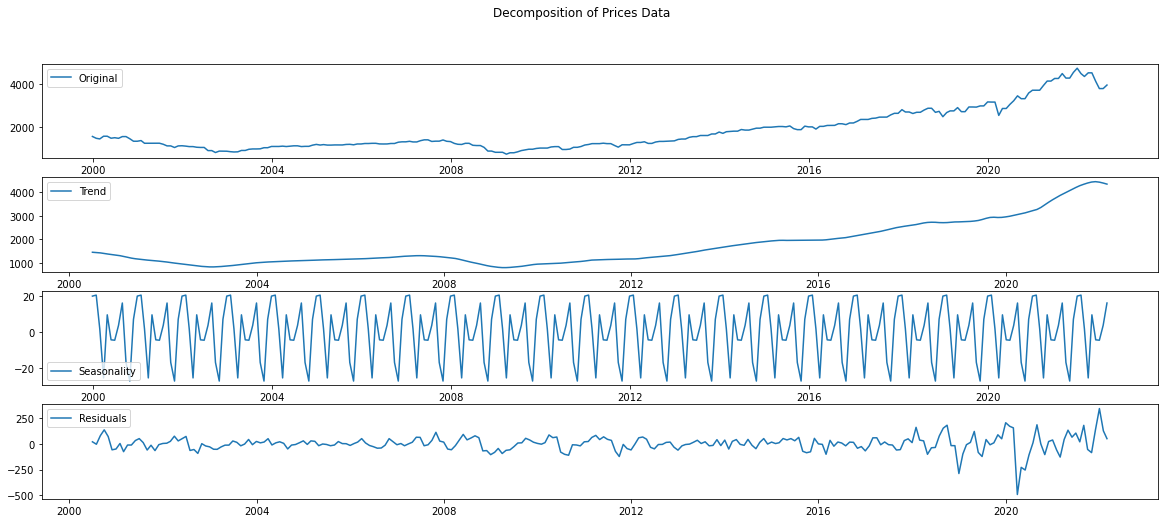

In [165]:
decomposition = sm.tsa.seasonal_decompose(df6.Close)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20,8))

plt.subplot(411)
plt.plot(df6.Close, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

fig.suptitle('Decomposition of Prices Data')
plt.show()

In [170]:
from statsmodels.tsa.stattools import adfuller, kpss

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    print('\n')
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    print('\n')
    
    if dfoutput['p-value'] < 0.05:
        print('Strong evidence against the null hypothesis')
        print('We reject the null hypothesis')
        print('Series has no unit root & is stationary')
    else:
        print('Weak evidence against the null hypothesis')
        print('We fail to reject the null hypothesis')
        print('Series has unit root and is non-stationary')
        
##############################################################
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    print('\n')
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
    print('\n')
    
    if kpss_output['p-value'] < 0.05:
        print('Strong evidence against the null hypothesis')
        print('We reject the null hypothesis')
        print('Series has unit root and is non-stationary')
    else:        
        print('Weak evidence against the null hypothesis')
        print('We fail to reject the null hypothesis')
        print('Series has no unit root & is stationary')

In [166]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df6.Close)[1])

Dickey–Fuller test: p=0.990017


In [167]:
print(adf_test(df6['Close']))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(kpss_test(df6['Close']))

Results of Dickey-Fuller Test:


Test Statistic                   0.709067
p-value                          0.990017
#Lags Used                      14.000000
Number of Observations Used    258.000000
Critical Value (1%)             -3.455953
Critical Value (5%)             -2.872809
Critical Value (10%)            -2.572775
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has unit root and is non-stationary
None
~~~~~~~~~~~~~~~~~~~~~~~~~~
Results of KPSS Test:


Test Statistic            1.912085
p-value                   0.010000
Lags Used                10.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Strong evidence against the null hypothesis
We reject the null hypothesis
Series has unit root and is non-stationary
None


In [172]:
from statsmodels.tsa.statespace.tools import diff 
df_diff = diff(df6['Close'],k_diff=2)
print(adf_test(df_diff))
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(kpss_test(df_diff))

Results of Dickey-Fuller Test:


Test Statistic                  -5.278560
p-value                          0.000006
#Lags Used                      14.000000
Number of Observations Used    256.000000
Critical Value (1%)             -3.456155
Critical Value (5%)             -2.872897
Critical Value (10%)            -2.572822
dtype: float64


Strong evidence against the null hypothesis
We reject the null hypothesis
Series has no unit root & is stationary
None
~~~~~~~~~~~~~~~~~~~~~~~~~~
Results of KPSS Test:


Test Statistic            0.07218
p-value                   0.10000
Lags Used                27.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


Weak evidence against the null hypothesis
We fail to reject the null hypothesis
Series has no unit root & is stationary
None


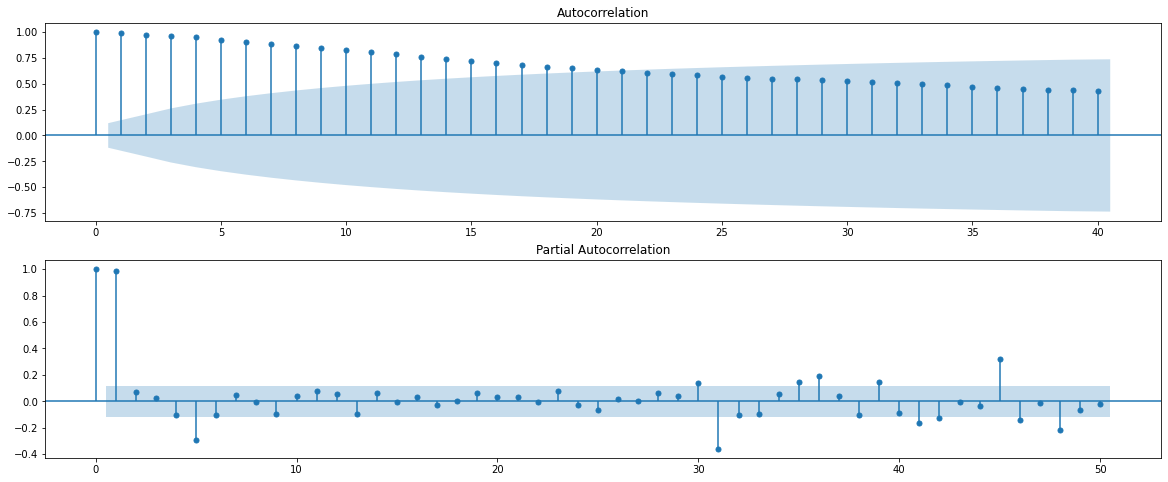

In [82]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(20,8))
pyplot.subplot(211)
plot_acf(df6.Close, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(df6.Close, ax=pyplot.gca(), lags=50)
pyplot.show()

- Auto correlation represents the degree of similarity between a given time series and a lagegd version of itself over successive time intervals. It measures the relationship between a variable's current value and its past values

- Partial correlation is the summary of the correlation between the series and the lag itself

In [85]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df6.Close, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12),enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [168]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
best_model.summary()
#AIC is a mathematical method for evaluating how well a mdoel fits the data it was generated from

      parameters          aic
47  (2, 1, 2, 1)  2830.714837
41  (2, 0, 2, 1)  2831.049621
53  (2, 2, 2, 1)  2834.832864
29  (1, 1, 2, 1)  2840.166407
23  (1, 0, 2, 1)  2840.445102


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  273
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -1408.357
Date:                            Sat, 17 Sep 2022   AIC                           2830.715
Time:                                    00:21:14   BIC                           2854.902
Sample:                                12-31-1999   HQIC                          2840.467
                                     - 08-31-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8035      0.182     -4.417      0.000      -1.160      -0.447
ar.L2          0.0383      0.049      0.780      0.436      -0.058       0.134
ma.L1          0.7772      0.183      4.241      0.000       0.418       1.136
ar.S.L12      -0.0393      0.092     -0.429      0.668      -0.219       0.140
ar.S.L24      -0.0957      0.086     -1.115      0.265      -0.264       0.073
ma.S.L12      -0.8176      0.087     -9.386      0.000      -0.988      -0.647
sigma2      9588.8699    422.262     22.708      0.000    8761.252    1.04e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1110.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              11.20   Skew:                            -1.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Dickey–Fuller test:: p=0.000003


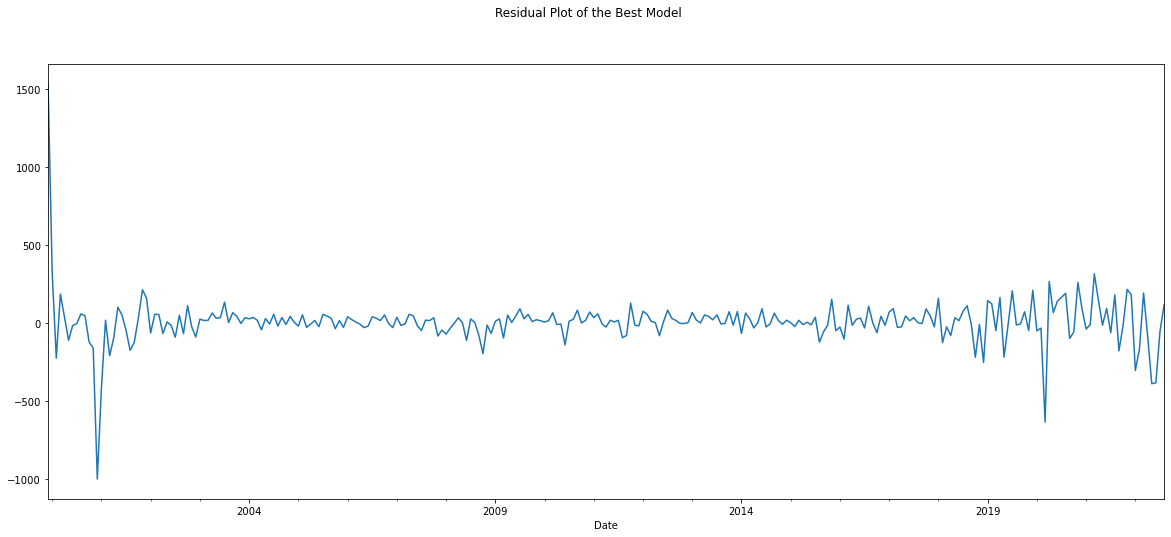

In [192]:
fig, ax = plt.subplots(figsize=(20,8))
best_model.resid.plot()
fig.suptitle('Residual Plot of the Best Model')
print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid)[1])
#p value <0.05
# Weak evidence against the null hypothesis
# We fail to reject the null hypothesis
# Series has unit root and is non-stationary

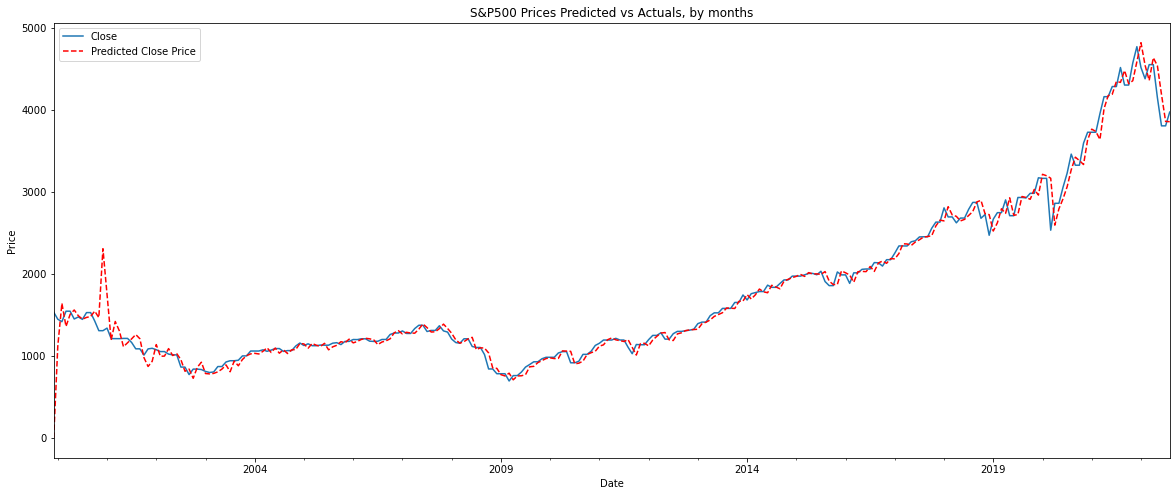

In [193]:
df_month2 = df6[['Close']]
future = pd.DataFrame()
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=600)

plt.figure(figsize=(20,8))
df_month2.Close.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Close Price')
plt.legend()
plt.title('S&P500 Prices Predicted vs Actuals, by months')
plt.ylabel('Price')
plt.show()

We can see the model is overfitted

We can see the above model representing S&P500 historical close price data and the prediction seems to do okay. The price can be influenced by any external news, events or social media. Currently September tends to be the worst month for stocks. However, since the beginning of the year 2022, stock has been a rough year due to high inflation, high interest rate and the current war between Russia and Ukraine. 